<a href="https://colab.research.google.com/github/gideonkipkorir/Data_projects_repo/blob/main/Analytics_of_Geospatial_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# import geopandas as gpd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/data/API_EG.ELC.RNEW.ZS_DS2_en_csv_v2_4358440.csv',skiprows=4)
df = df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',\
          '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009',\
           '2010', '2011', '2012', '2013','2014', '2015']]

population = pd.read_csv('/content/drive/MyDrive/data/API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv',skiprows=4)
pop_df= pd.DataFrame(population[['Country Name',	'Country Code', '2005','2010' ]])

In [ ]:
#merging the two datasets
merged_df = df.merge(pop_df, how ='left', right_on ='Country Code', left_on = 'Country Code')
merged_df.head()

,Country Name_x,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005_x,...,2009,2010_x,2011,2012,2013,2014,2015,Country Name_y,2005_y,2010_y
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11.327377,12.101021,14.915254,14.912186,15.099280,14.856161,Aruba,100028.0,101665.0
1,Africa Eastern and Southern,AFE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,15.983738,17.584168,18.035637,16.930335,16.944777,17.691273,...,19.755338,21.162999,21.323779,21.795825,22.732604,24.966589,25.675879,Africa Eastern and Southern,453404076.0,518468229.0
2,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,74.989094,72.811460,79.063971,70.249729,70.890841,74.061810,...,87.176603,85.986547,82.487562,85.909980,78.636408,85.323549,86.050111,Afghanistan,25654274.0,29185511.0
3,Africa Western and Central,AFW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,52.858873,51.323559,46.263090,45.451884,45.648428,44.093335,...,41.550212,38.547084,37.703650,36.037935,35.163864,34.566146,31.233531,Africa Western and Central,305520588.0,350556886.0
4,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,63.114187,62.087912,64.759207,62.205514,78.405018,79.648241,...,65.343189,67.957423,70.907804,60.799484,58.020935,53.175105,53.174928,Angola,19433604.0,23356247.0


In [ ]:
#importing libriaries for geo- visualizations
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [ ]:
def geo_maps(df_f, values,c_name, title , colour_title ):
  fig = go.Figure(data=go.Choropleth(
      locations = df_f['Country Code'],
      z = df_f[values],
      text = df_f[c_name],
      colorscale = 'Blues',
      autocolorscale=False,
      reversescale=True,
      marker_line_color='darkgray',
      marker_line_width=0.5,
      # colorbar_tickprefix = '$',
      colorbar_title = colour_title,
  ))

  fig.update_layout(
      title_text=title,
      geo=dict(
          showframe=False,
          showcoastlines=False,
          projection_type='equirectangular'
      ),
      annotations = [dict(
          x=0.55,
          y=0.1,
          xref='paper',
          yref='paper',
          text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
              CIA World Factbook</a>',
          showarrow = False
      )]
  )

  return fig.show()

## Task 1.2.1

In [ ]:
 #maps of renewable electricity output for only the countries having population less than 9029575,  
geo_maps(df_f, '2005_x','Country Name_x', 'countries having population less than 9029575' , 'renewable<br>electricity output' )

There is little investment in reneweable energy in oil-producing countries or countries with fossil fuel deposits.

## Task 1.2*.2*

In [ ]:
#maps of renewable electricity output for only the countries having population greater than 295516595.
df_f = merged_df[merged_df['2005_y']>=  295516595]
geo_maps(df_f, '2005_x','Country Name_x', 'countries  having population greater than 295516595' , 'renewable<br>electricity output' )

In highly populated , most of the are industrialized, but the investments in renewable energy is more in Asian countries than North America.

## Task 1.2.3


In [ ]:
# maps of renewable electricity output for only the countries having population between 138865014 and 1147609925.
df_f = merged_df[(merged_df['2005_y']>=  138865014 ) & (merged_df['2005_y']<= 1147609925 )]
geo_maps(df_f, '2005_x','Country Name_x', 'countries having population between 138865014 and 1147609925' , 'renewable<br>electricity output' )

In [ ]:
diff= merged_df[merged_df['2010_y']==merged_df['2010_y'].max()]#finding the country with the most population in 2020
diff

,Country Name_x,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005_x,...,2009,2010_x,2011,2012,2013,2014,2015,Country Name_y,2005_y,2010_y
259,World,WLD,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,18.333155,17.869591,17.788654,17.378554,17.809716,17.97509,...,19.334182,19.560998,19.932825,20.901536,21.710346,22.407258,22.854456,World,6.511725e+09,6.921855e+09


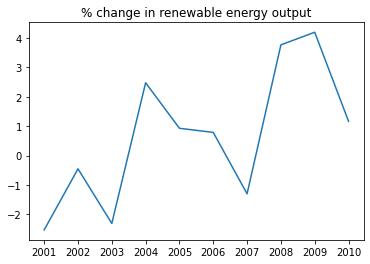

In [ ]:
#selecting the years to be studied
d = merged_df['2000'][259] , merged_df['2001'][259], merged_df['2002'][259], merged_df['2003'][259], merged_df['2004'][259] , merged_df['2005_x'][259],\
   merged_df['2006'][259],merged_df['2007'][259],merged_df['2008'][259],merged_df['2009'][259],merged_df['2010_x'][259]
d = list(d)
diff = [round(((d[i+1] - d[i])/(d[i]))*100,2) for i in range (len(d)-1)] #finding the difference from year
period = [ '2001', '2002', '2003', '2004', '2005', '2006', '2007',\
       '2008', '2009', '2010']
#visualization of a scatter plot     
# plt.lineplot(period, diff, c ="blue")
plt.plot(period, diff)
plt.title("% change in renewable energy output")
plt.show()


The investment in renewable energy has significantly improve over the past 10 years and the trend seems to contnue in future

## Task 1.2.4

Present a scatter plot between mean population of each country and mean renewable electricity output
considering from year 2000 until 2010. Very briefly interpret the generated plot, particularly look for any 
correlation (if present) among the plotted variables. In this question, you have to consider each year 
between 2000 and 2010 to find the mean population and mean renewable electricity output.


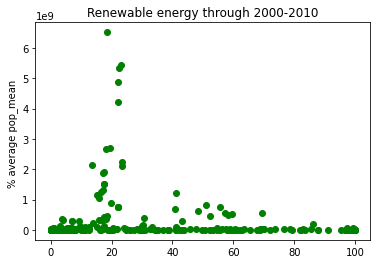

In [ ]:
#Population mean
p_df = population[['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010']]
p_df.head()
popmean = [np.mean((np.array(p_df)[i])) for i in range(len(p_df))]
#renewable energy output mean
mean_renew_ = np.array(merged_df)[0:, 4:17]
mean_renew_ = [np.mean(mean_renew_ [i]) for i in range(len(mean_renew_ ))]
#scatter plot
#visualization of a scatter plot     
plt.scatter(mean_renew_,popmean, c ="green")
plt.ylabel("% average pop_mean ")
plt.title('Renewable energy through 2000-2010')
plt.show()

# PART 2 – Geospatial Sentiment Analysis using Social Media Data


In [ ]:
df_t=pd.read_csv('/content/drive/MyDrive/data/Task 2 Tweet Data.csv')
df_t.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,@sjmuir Why I like local Renewable Natural Gas...,NaN,False,0,0,0,0,en,Twitter for iPhone,NaN,NaN
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,Nevada is critical towards the clean energy tr...,Greater Vancouver,False,0,1,21,0,en,Twitter for iPhone,NaN,NaN
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,COP26 Net Zero Commitments will Speed Energy T...,NaN,False,0,0,0,0,en,TekieBoard,NaN,NaN
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,@alanfryermedia You’re onto something! 🇨🇦 has ...,"Calgary, Alberta",False,0,1,5,0,en,Twitter for iPhone,NaN,NaN
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,"""The reality is that actions in this decade wi...","New York, New York",True,0,1,3,1,en,Twitter for Advertisers.,NaN,NaN


## Task 2.1: Data Pre-processing

In [ ]:
#deleting data prpocessing libriaries
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
nltk.download("stopwords")
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
df_t.tweetContent = df_t.tweetContent.apply(lambda x: preprocess(x))
df_t.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,like local renewable natural gas hydrogen fair...,NaN,False,0,0,0,0,en,Twitter for iPhone,NaN,NaN
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,nevada critical towards clean energy transition,Greater Vancouver,False,0,1,21,0,en,Twitter for iPhone,NaN,NaN
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,cop26 net zero commitments speed energy transi...,NaN,False,0,0,0,0,en,TekieBoard,NaN,NaN
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,onto something low carbon energy mix specifica...,"Calgary, Alberta",False,0,1,5,0,en,Twitter for iPhone,NaN,NaN
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,reality actions decade decisive planet warming...,"New York, New York",True,0,1,3,1,en,Twitter for Advertisers.,NaN,NaN


In [ ]:
dff= df_t.sample(500, random_state =12)#sampling 500 tweets

## Task 2.2: Geocoding

In [ ]:
from geopy.geocoders import Nominatim

#initialize the Nominatim object
Nomi_locator = Nominatim(user_agent="My  Geo")
#finding latitude and longitude for the locations
latitude = []
longitude=[]
for l in dff.userLocation[:340]:
   location = Nomi_locator.geocode(l, timeout = 4)
   if location == None:
     latitude.append('None')
     longitude.append('None')
   else:
      latitude.append(location.latitude)
      longitude.append(location.longitude)

In [ ]:
#adding the new variables to the dataframe
dff = dff[:340]
dff['latitude'] = latitude
dff['longitude'] = longitude

## Task 2.3 Polarity analysis

In [ ]:
from textblob import TextBlob
dff['Polarity'] = dff.tweetContent.apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
attitude = []
for n in dff.Polarity:
  if n > 0:
    attitude.append('positive')
  elif n == 0:
    attitude.append('neutral')
  elif n<0:
    attitude.append('negative')
dff['sentiment']= attitude
dff.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,latitude,longitude,Polarity,sentiment
13996,https://twitter.com/FbmHero/status/14540430868...,1454043086892331009,2021-10-29T11:11:01+00:00,coal nuclear carbon china energy greenenergy e...,Currently all ard Perth & Sydn,False,0,1,0,0,en,Twitter Web App,None,None,0.075000,positive
12760,https://twitter.com/Redef_Energy/status/145501...,1455018057957531648,2021-11-01T03:45:12+00:00,new podcast 61 future power distribution netwo...,"London, England",False,0,3,5,1,en,Spreaker,51.507322,-0.127647,0.045455,positive
3821,https://twitter.com/rabbleca/status/1458855042...,1458855042333745152,2021-11-11T17:52:00+00:00,important working people sunset industries get...,NaN,False,0,3,5,0,en,Buffer,46.314475,11.048029,0.200000,positive
15103,https://twitter.com/KleinmanEnergy/status/1453...,1453514606886916099,2021-10-28T00:11:01+00:00,past event last week welcomed visiting scholar...,"Philadelphia, PA",False,0,0,4,0,en,Sprout Social,39.952724,-75.163526,0.038889,positive
3596,https://twitter.com/PlattsGas/status/145905990...,1459059903742590986,2021-11-12T07:26:03+00:00,singapore working long term plan decarbonize e...,global,False,0,7,14,1,en,Oktopost,43.728387,-79.349149,0.025000,positive


In [ ]:
dff = dff.drop(['coordinates','place'],1)

In [ ]:
# dff.dropna(inplace =True)

In [ ]:
import plotly.express as px
def world_maps(data, polarity,sentiment, title ):
  fig = px.choropleth(data, locations=dff.userLocation,
                      locationmode="country names", color=data[polarity], 
                      scope="world",
                      hover_name=sentiment,
                      color_continuous_scale=px.colors.sequential.PuRd
                    )
  fig.update_geos(fitbounds="locations", visible=False)
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_text=title, title_x=0.3, title_y=0.96,font_size=18)
  return fig.show()

In [ ]:
world_maps(dff, 'Polarity','sentiment', "world's sentiment during the cop 26" )

## Task 2.4 Subjectivity analysis


In [ ]:
dff['subjectivity'] = dff.tweetContent.apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
dff.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,latitude,longitude,Polarity,sentiment,subjectivity
13996,https://twitter.com/FbmHero/status/14540430868...,1454043086892331009,2021-10-29T11:11:01+00:00,coal nuclear carbon china energy greenenergy e...,Currently all ard Perth & Sydn,False,0,1,0,0,en,Twitter Web App,None,None,0.075000,positive,0.300000
12760,https://twitter.com/Redef_Energy/status/145501...,1455018057957531648,2021-11-01T03:45:12+00:00,new podcast 61 future power distribution netwo...,"London, England",False,0,3,5,1,en,Spreaker,51.507322,-0.127647,0.045455,positive,0.193182
3821,https://twitter.com/rabbleca/status/1458855042...,1458855042333745152,2021-11-11T17:52:00+00:00,important working people sunset industries get...,NaN,False,0,3,5,0,en,Buffer,46.314475,11.048029,0.200000,positive,0.500000
15103,https://twitter.com/KleinmanEnergy/status/1453...,1453514606886916099,2021-10-28T00:11:01+00:00,past event last week welcomed visiting scholar...,"Philadelphia, PA",False,0,0,4,0,en,Sprout Social,39.952724,-75.163526,0.038889,positive,0.338889
3596,https://twitter.com/PlattsGas/status/145905990...,1459059903742590986,2021-11-12T07:26:03+00:00,singapore working long term plan decarbonize e...,global,False,0,7,14,1,en,Oktopost,43.728387,-79.349149,0.025000,positive,0.400000


In [ ]:
world_maps(dff, 'subjectivity','sentiment', "world's sentiment and subjectivity during the cop 26" )